In [1]:
import os
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [17]:
import os 
import pandas as pd
dataset_path = 'C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVillage/'
selected_classes = disease_list = [
    'Pepper__bell___Bacterial_spot', 'Potato___Late_blight', 'Tomato_Late_blight', 
    'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 
    'Potato___healthy', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


data = []
labels = []
# Iterate through the dataset directory
for class_name in os.listdir(dataset_path):
    if class_name in selected_classes:
        class_dir = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            data.append(img_path)
            labels.append(class_name)

df = pd.DataFrame({'data': data, 'label': labels})

In [18]:
df

,data,label
0,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Pepper__bell___Bacterial_spot
1,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Pepper__bell___Bacterial_spot
2,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Pepper__bell___Bacterial_spot
3,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Pepper__bell___Bacterial_spot
4,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Pepper__bell___Bacterial_spot
...,...,...
11516,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Tomato__Tomato_YellowLeaf__Curl_Virus
11517,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Tomato__Tomato_YellowLeaf__Curl_Virus
11518,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Tomato__Tomato_YellowLeaf__Curl_Virus
11519,C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVi...,Tomato__Tomato_YellowLeaf__Curl_Virus


In [19]:
image = Image.open("C:/Users/ADMIN_PC/Desktop/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG")

width, height = image.size
print(f"Width: {width}, Height: {height}")

Width: 256, Height: 256


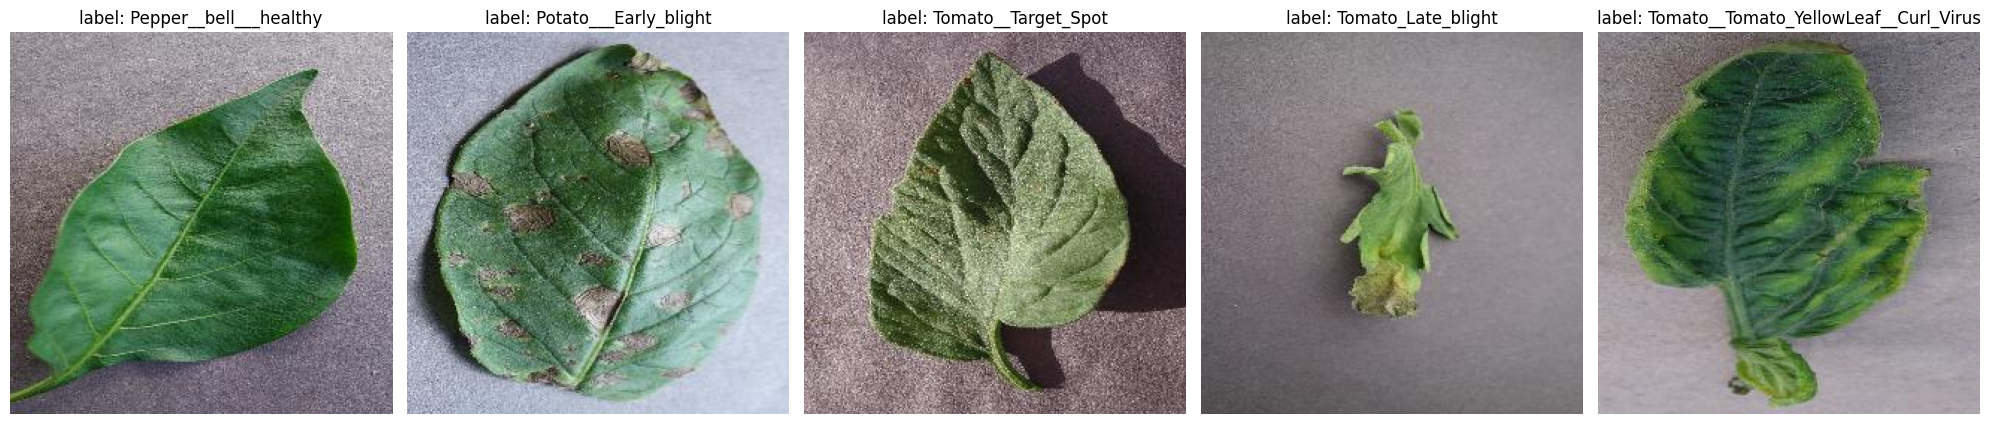

In [20]:
plt.figure(figsize=(20, 15))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    index = np.random.choice(df.index)
    filename = df.loc[index, 'data']
    category = df.loc[index, 'label']
    img = Image.open(filename)
    plt.imshow(img)
    plt.title(f'label: {category}')
    plt.axis('off') 

plt.tight_layout()
plt.show()

In [21]:
def extract_hog_features(image):
    # Convert the image to grayscale using cv2
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hog = cv2.HOGDescriptor()
    
    # Compute HOG features
    hog_features = hog.compute(gray_image)

    return hog_features.flatten()

In [22]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
batch_size = 32  # Adjust batch size based on memory constraints
features_list = []
labels_list = []

# Resize function to downsample images
def resize_image(image, new_size=(128, 128)):
    return cv2.resize(image, new_size)

for start in range(0, len(df_shuffled), batch_size):
    end = min(start + batch_size, len(df_shuffled))
    batch = df_shuffled[start:end]

    batch_features = []
    batch_labels = []

    for index, row in batch.iterrows():
        image = cv2.imread(row['data'])
        resized_image = resize_image(image)  # Resize image to smaller dimensions
        hog_features = extract_hog_features(resized_image)
        batch_features.append(hog_features)
        batch_labels.append(row['label'])

    features_list.extend(batch_features)
    labels_list.extend(batch_labels)


In [23]:
for index, row in batch.iterrows():
    try:
        image = cv2.imread(row['data'])
        if image is None:
            print("Error: Unable to read image at path:", row['data'])
            continue
        resized_image = resize_image(image)  # Resize image to smaller dimensions
        hog_features = extract_hog_features(resized_image)
        batch_features.append(hog_features)
        batch_labels.append(row['label'])
    except Exception as e:
        print("Error processing image:", row['data'])
        print(e)  # Print the specific error message


In [24]:
# Convert lists to NumPy arrays
features_array = np.array(features_list)
labels_array = np.array(labels_list)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_array)

print("Shape of extracted features:", features_array.shape)


Shape of extracted features: (11521, 34020)


In [25]:
len(labels_encoded)

11521

In [11]:
np.unique(labels_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_encoded, test_size=0.25, random_state=42 , stratify = labels_encoded)

In [27]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (8640, 34020)
<class 'numpy.ndarray'> (8640,)
<class 'numpy.ndarray'> (2881, 34020)
<class 'numpy.ndarray'> (2881,)


In [28]:
lr_pipeline = Pipeline([
    ('pca', PCA(n_components=2100,random_state=42)), 
    ('classifier', LogisticRegression(max_iter = 1000,random_state=42))
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2100, random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [29]:
predictions = lr_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7688


In [30]:
report = classification_report(y_test, predictions, output_dict=True,zero_division=1)

# Convert the report to a pandas DataFrame for better visualization
report = pd.DataFrame(report).transpose()

print(report)

              precision    recall  f1-score     support
0              0.636364  0.618474  0.627291   249.00000
1              0.802168  0.800000  0.801083   370.00000
2              0.770677  0.820000  0.794574   250.00000
3              0.697095  0.672000  0.684318   250.00000
4              0.500000  0.263158  0.344828    38.00000
5              0.712575  0.746862  0.729316   478.00000
6              0.739362  0.792023  0.764787   351.00000
7              0.878481  0.865337  0.871859   802.00000
8              0.697368  0.569892  0.627219    93.00000
accuracy       0.768830  0.768830  0.768830     0.76883
macro avg      0.714899  0.683083  0.693919  2881.00000
weighted avg   0.767346  0.768830  0.767108  2881.00000


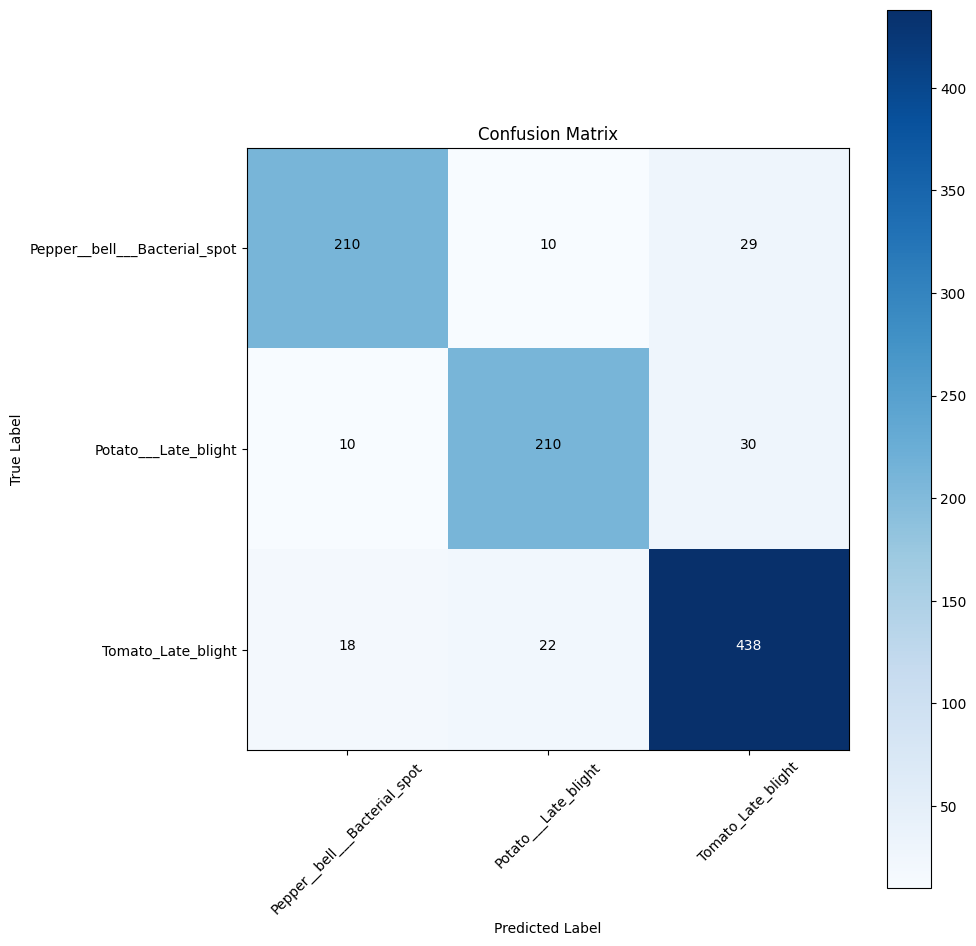

In [24]:
classes = selected_classes


cm = confusion_matrix(y_test, predictions)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


plt.show()